**Notebook credit**: based on the F. Chollet's original notebook [here](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb).

## A 10 class classification problem


- We will classify grayscale images of handwritten digits (28 × 28 pixels) into 10 categories (0 through 9)
- We’ll use the MNIST dataset, a classic in the machine learning community
- Has 60,000 training images, plus 10,000 test images
- Was assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s
- You can think of working with MNIST as the “Hello World” of deep learning

**Loading the MNIST dataset in Keras**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

The MNIST dataset comes preloaded in Keras in four NumPy
arrays.

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape # images are encoded as NumPy arrays

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels # labels are encoded as an array of digits

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Workflow**

1. We’ll feed the neural network the training data, `train_images` and `train_labels`
2. The network will then learn to associate images and labels.
3. We’ll ask the network to produce predictions for `test_images`, and we’ll verify whether these predictions match the labels from `test_labels`.

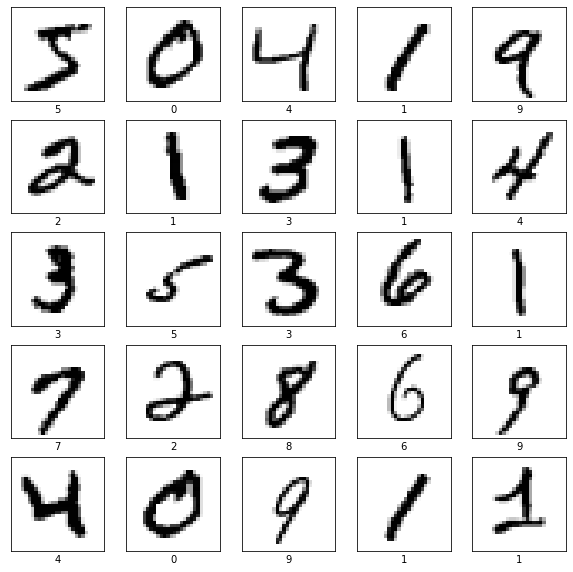

In [9]:
# Don't worry about the details of the plotting commands below. You won't be tested on this stuff.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

**The network architecture**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])


**Layers**

- The core building block of neural networks is the *layer*
- Data goes into a layer, and it comes out in a more useful form
- Layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand
- Deep learning consists of chaining together simple layers

**Our model above**

- First layer is *not trainable*, just reshapes the input
- Next comes a sequence of two `Dense` layers
- These are densely connected (also called _fully connected_) neural layers
- The last layer is a 10-way softmax classification layer
- It will return an array of 10 probability scores (summing to 1)
- Each score will be the probability that the current digit image belongs to one of our 10 digit classes
- Next let's look at our model summary
- Can you figure out the parameter count from layer shapes?

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**The compilation step**

This step involves choosing:
- An *optimizer*—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance
- A *loss function*—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
-*Metrics to monitor during training and testing*—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [12]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

- Previously, our training images were stored in an array of type `uint8` with values in the [0, 255] interval
- We’ll transform it into a `float64` array with values between 0 and 1.

In [13]:
print(f"train_images is previously of type {train_images.dtype}")
train_images = train_images / 255.0
test_images = test_images / 255.0
print(f"train_images is now of type {train_images.dtype}")

train_images is previously of type uint8
train_images is now of type float64


**"Fitting" the model**

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2564 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1035 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0682 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0483 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0372 - accuracy: 0.9888


Two quantities are displayed during training:

- the loss of the model over the training data
- the accuracy of the model over the training data
- we quickly reach an accuracy of 0.989 (98.9%) on the training data

**Using the model to make predictions**

- Now we use a trained model to predict class probabilities for _new_ digits
- These images in the test set weren’t part of the training data

In [15]:
predictions = model.predict(test_images)
predictions[0]

array([8.22440871e-09, 1.41062162e-11, 2.54116276e-06, 1.22478974e-04,
       1.37547309e-12, 8.08775269e-08, 9.79081318e-15, 9.99874115e-01,
       1.08643036e-07, 6.51522669e-07], dtype=float32)

- Each number of index `i` in the array above corresponds to the probability that digit image `test_digits[0]` belongs to class `i`.
- This first test digit has the highest probability score (almost 1) at index 7
- So according to our model, it must be a 7

In [16]:
predictions[0].argmax()

7

In [17]:
predictions[0][7]

0.9998741

Predicted label agrees with the true label.

In [18]:
test_labels[0]

7

**Evaluating the model on new data**

Let's compute the average accuracy over the entire test set.

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9773
test_acc: 0.9772999882698059


- The test-set accuracy turns out to be just under 98%
- That’s a bit lower than the training-set accuracy (98.9%)
- This gap between training accuracy and test accuracy is an example of _overfitting_:
  - the fact that machine learning models tend to perform worse on new data than on their training data
  - we will look at overfitting in more detail later in the course

**Visualizing first few predictions and first few mistakes**

_Note: this section is for visualization purposes only. You will not be tested on this stuff_

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

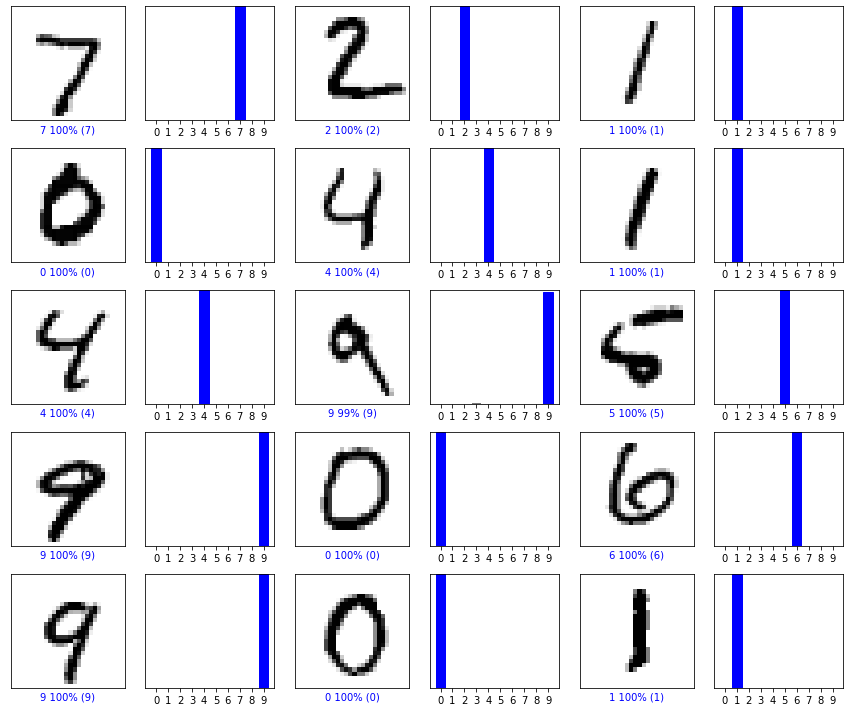

In [21]:
# plot first few predictions

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

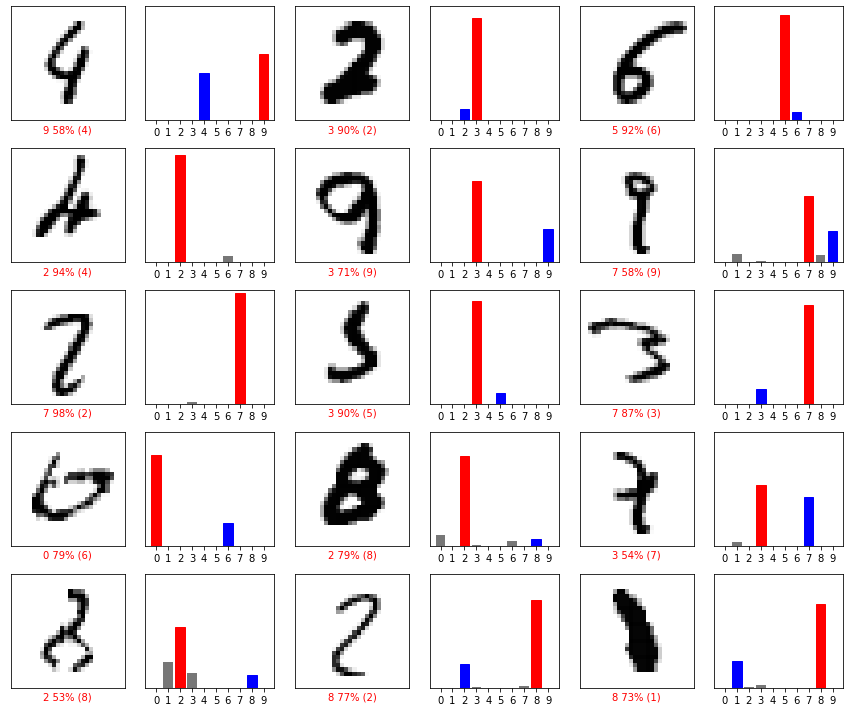

In [22]:
# plot first few mistakes

num_rows = 5
num_cols = 3
i, mistakes = 0, 0
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
while mistakes < num_rows*num_cols:
  if predictions[i].argmax() != test_labels[i]: # plot only if prediction incorrect
    plt.subplot(num_rows, 2*num_cols, 2*mistakes+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*mistakes+2)
    plot_value_array(i, predictions[i], test_labels)
    mistakes += 1
  i = i + 1
plt.tight_layout()
plt.show()